In [2]:
#Importing required modules
import pandas as pd
import numpy as np
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt

In [3]:
iris = pd.read_csv("E:\AI_DATA\iris_csv.csv")
iris.head()

,sepallength,sepalwidth,petallength,petalwidth,class
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa


In [4]:
iris.shape

(150, 5)

In [5]:
iris['class'].value_counts()

Iris-setosa        50
Iris-versicolor    50
Iris-virginica     50
Name: class, dtype: int64

In [6]:
iris.columns

Index(['sepallength', 'sepalwidth', 'petallength', 'petalwidth', 'class'], dtype='object')

In [8]:
X = iris.iloc[:,0:4]
X.head()

,sepallength,sepalwidth,petallength,petalwidth
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2


In [10]:
y = iris.iloc[:,-1]
y.head()

0    Iris-setosa
1    Iris-setosa
2    Iris-setosa
3    Iris-setosa
4    Iris-setosa
Name: class, dtype: object

In [11]:
from sklearn import preprocessing
X = preprocessing.StandardScaler().fit_transform(X)
X[0:4]

array([[-0.90068117,  1.03205722, -1.3412724 , -1.31297673],
       [-1.14301691, -0.1249576 , -1.3412724 , -1.31297673],
       [-1.38535265,  0.33784833, -1.39813811, -1.31297673],
       [-1.50652052,  0.10644536, -1.2844067 , -1.31297673]])

In [12]:
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=1, test_size=0.3)

In [14]:
KnnModel = KNeighborsClassifier(n_neighbors = 3)
KnnModel.fit(X_train,y_train)

KNeighborsClassifier(n_neighbors=3)

In [15]:
y_pred = KnnModel.predict(X_test)

In [18]:
from sklearn.metrics import accuracy_score
acc = accuracy_score(y_test, y_pred)
print("Accuracy score is: ",round(acc*100,2))

Accuracy score is:  97.78


In [20]:
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test, y_pred)
print("Confusion Matrix: \n",cm)

Confusion Matrix: 
 [[14  0  0]
 [ 0 18  0]
 [ 0  1 12]]


In [22]:
cm1 = pd.DataFrame(data = cm, index = ['Iris-Setosa','Iris-Versicolor', 'Iris-Virginica'], columns= ['Iris-Setoas', 'Iris-Versicolor', 'Iris-Virginica'])
print('Confusion Matrix in detail: \n',cm1)

Confusion Matrix in detail: 
                  Iris-Setoas  Iris-Versicolor  Iris-Virginica
Iris-Setosa               14                0               0
Iris-Versicolor            0               18               0
Iris-Virginica             0                1              12


In [29]:
prediction = pd.DataFrame(data = [y_test.values, y_pred], index = ['y_test', 'y_pred'])
print('Prediction is: ')
prediction.transpose()

Prediction is: 


,y_test,y_pred
0,Iris-setosa,Iris-setosa
1,Iris-versicolor,Iris-versicolor
2,Iris-versicolor,Iris-versicolor
3,Iris-setosa,Iris-setosa
4,Iris-virginica,Iris-virginica
5,Iris-versicolor,Iris-versicolor
6,Iris-virginica,Iris-virginica
7,Iris-setosa,Iris-setosa
8,Iris-setosa,Iris-setosa
9,Iris-virginica,Iris-virginica


In [31]:
prediction.iloc[0,:].value_counts()

Iris-versicolor    18
Iris-setosa        14
Iris-virginica     13
Name: y_test, dtype: int64

In [33]:
y_prediction = KnnModel.predict([[2.3, 2.4, 5.6, 3.2]])
print(y_prediction)

['Iris-virginica']


In [37]:
ks = 21
mean_acc = np.zeros((ks-1))
error_rate = []
for n in range(1, ks):
    neighbor = KNeighborsClassifier(n_neighbors = n).fit(X_train, y_train)
    yhat = neighbor.predict(X_test)
    mean_acc [n-1] = accuracy_score(y_test, yhat)
    error_rate.append(np.mean(yhat != y_test))
print(mean_acc)

[0.95555556 0.95555556 0.97777778 0.95555556 0.95555556 0.97777778
 0.97777778 0.97777778 0.95555556 0.95555556 0.95555556 0.95555556
 0.95555556 0.95555556 0.95555556 0.95555556 0.93333333 0.93333333
 0.93333333 0.95555556]


In [38]:
print(error_rate)

[0.044444444444444446, 0.044444444444444446, 0.022222222222222223, 0.044444444444444446, 0.044444444444444446, 0.022222222222222223, 0.022222222222222223, 0.022222222222222223, 0.044444444444444446, 0.044444444444444446, 0.044444444444444446, 0.044444444444444446, 0.044444444444444446, 0.044444444444444446, 0.044444444444444446, 0.044444444444444446, 0.06666666666666667, 0.06666666666666667, 0.06666666666666667, 0.044444444444444446]


In [40]:
print('Best Accuracy was with: ',mean_acc.max(),' with k:',mean_acc.argmax()+1)

Best Accuracy was with:  0.9777777777777777  with k: 3


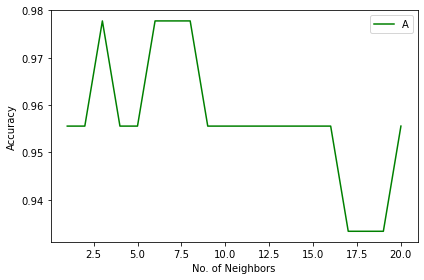

In [49]:
plt.plot(range(1,ks), mean_acc, 'g')
plt.legend('Accuracy')
plt.ylabel('Accuracy')
plt.xlabel('No. of Neighbors')
plt.tight_layout()
plt.show()